# Simulation of a data set relating to eyesight

## Programming for Data Analysis Project 2019

## Preliminaries

Load the various packages required to complete the work and set up the matplotlib plotting environment.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.image as mpimg

Set plot preferences

In [2]:
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (6, 4) #10,6
# Set font size for axes labels etc.
plt.rcParams['font.size'] = (14)

## If I use Seaborn:
## To pick a color palette
# sns.choose_colorbrewer_palette(data_type="q")

## Set up my Seaborn plotting preferences.
# current_palette = sns.color_palette()
# sns.palplot(current_palette)
# sns.set_style('whitegrid')


***
## 1. Introduction

For this project, we have been asked to simulate a real-world phenomenon of our own choosing. Our task is to model and synthesize data relating to this phenomenon using Python, in particular the numpy.random package. The end product of this project should be a synthesized data set.   

I will examine the phenomenon of eyesight, specifically short-sightedness (also referred to as myopia). The questions I want to explore are: 
- What is the distribution of myopia in a random sample of the population?
- What are the factors that contribute to myopia?
- How are these individual factors/causes distributed in the population?
- Are the causes related to each other in any way?
- If so, how?

As I imagine what the final data set might look like, I want to imagine what a Seaborn pairplot might look like for the synthesized data set. From initial research:
- I expect the amount of myopia to be hereditary, suggesting use of a categorical variable to represent the strength of that hereditary factor. The pairplot might reveal clustering of data points for each value of that categorical variable.
- I think that the amount of myopia may have some dependence on age. It usually starts sometime during childhood and progresses through adolescence. 
- I need to model the distribution of ages in the population.
- I need to find out how myopia is distributed in the general population.
- Myopia is possibly related to environmental factors such as the amount of time one spends doing close work, or alternatively, how much time one spends outdoors. I have a feeling that is related to age.

***
## 2. Myopia

The README file that accompanies this notebook contains a comprehensive explanation of what myopia is, how it is quantified and corrected, and my reasons for wanting to study this phenomenon. I will briefly summarize those points here but I do want to minimize repetition. 

### 2.1 What is myopia?

Myopia is an eye condition that causes distant objects to appear blurry while only close objects appear clear. It is also referred to as short-sightedness. How close an object has to be to someone with myopia in order for them to see it clearly depends on that person's degree of myopia. It happens mainly because the eyeball grows too long and so light traveling through the eye comes to a focus in front of the retina (back surface) rather than exactly on it. Our brain records images that are formed **on** the retina, so the resulting image for a myopic person will be blurred. As light travels through the eye it is bent (refracted) by the cornea and lens. Myopia arises from the incorrect refraction of light for a particular eye; it is a refractive error.

<!--Drag and drop image to embed it-->
<!--Not rendering in GitHub so maybe insert another way-->
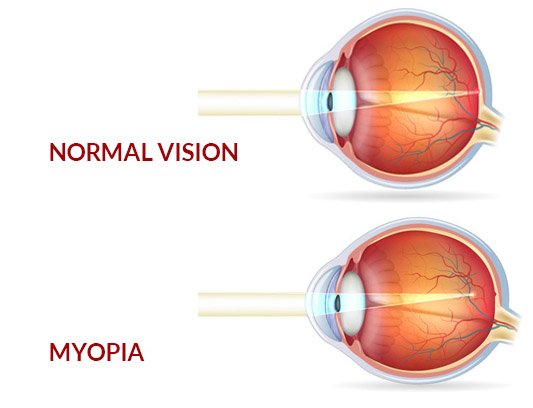

In [3]:
## Figure out later how to get rid of borders, axes, axes labels.
#image = mpimg.imread("images/myopia-and-normal.jpg")
#plt.imshow(image)
#plt.show()

### 2.2 How is it quantified and corrected?

All refractive errors are measured in Dioptres, the reciprocal of focal length in metres. 

$$D = 1/f(m)$$

The amount of myopia is quantified by the power of the lens required to correct it. Negative values are needed to correct myopia (move the best focus back onto the retina), so sort-sighted people have prescriptions like - 1.75 D, for example. The negative (concave) lenses used to correct myopia and are graduated in 0.25 D steps - the closest one to a patient's prescription is used. Differences smaller than this step size are imperceptible. 

Myopia is classified as:
- mild if the amount is less than 3 D
- moderate in the range -3 to -6 D
- high if more than -6 D

Text(6.2, 0.9, 'high')

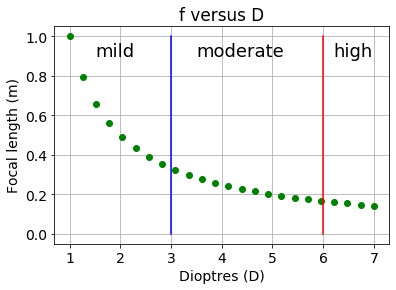

In [4]:
## Illustrate D vs f
d = np.linspace(1, 7, 24)
f = 1 / d

plt.plot(d, f, 'go')
plt.title("f versus D")
plt.xlabel("Dioptres (D)")
plt.ylabel("Focal length (m)")
plt.grid()
# Show limits
plt.plot([3, 3], [0, 1], 'b-')
plt.plot([6, 6], [0, 1], 'r-')
plt.text(1.5, 0.9, "mild", fontsize=18)
plt.text(3.5, 0.9, "moderate", fontsize=18)
plt.text(6.2, 0.9, "high", fontsize=18)

### 2.3 Why this question?

I'm interested in this topic because my teenage daughter has myopia. She started wearing glasses when she was nine years old, but it progressed very rapidly when she grew a lot at around 14 years. At that stage she had the same prescription as her dad, but because myopia progresses as you grow, her prescription would have been expected to increase all through her teenage years. She's now wearing special contact lenses in an attempt to slow its progression.

It's interesting to note that her dad has myopia, as do all of his siblings. In my family only one of six siblings is myopic. Myopia seems to be inherited and its severity increases through the generations, so that children frequently have more myopia than their parents if it's left untreated. People with high myopia are at greater risk of certain conditions in later life, such as retinal detachment, which can lead to blindness. 

***
## 3. Factors associated with myopia

***
## 4. Investigation of variables

In [5]:
# number of samples/observations in the data set
n = 400

### 4.1 Genes

This variable will be called **genes**. It is a categorical variable which can take on one of three values depending on how many parents are myopic. Possible values are:
- none if neither parent is myopic
- some if one parent is
- strong if both parents are

In [6]:
# Classify genetic predisposition to myopia depending on how many parents are myopic
# 'none' if neither, 'some' if one, 'strong' if both
genetic_predisp = ['none', 'some', 'strong']

# In a random sample, what is the probability of finding each of these predispositions?
# 25% have myopia, 4% high, so 75% don't. Reflect this roughly in the distribution.
genes = np.random.choice(genetic_predisp, n, p=[0.6, 0.30, 0.10])

# https://stackoverflow.com/questions/28663856/how-to-count-the-occurrence-of-certain-item-in-an-ndarray-in-python
print(np.count_nonzero(genes == 'none'))
print(np.count_nonzero(genes == 'some'))
print(np.count_nonzero(genes == 'strong'))

239
121
40


This genetic predisposition will have some influence on how much myopia each person has. At this stage of the analysis, I am not sure of scale factor from none to weak to strong.

### 4.2 Refractive error

This variable will be called **myopia**. It is a numerical variable, a negative real number with two decimal places. It has a maximum value of zero (no myopia) and it increases in the negative direction. It is the most important variable in my data set. I think a normal distribution would be a good place to start to represent this variable as that distribution is common in nature.  

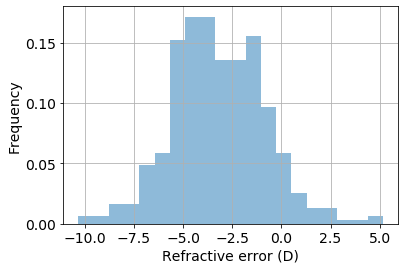

In [7]:
# Model refractive error with a normal distribution first.
m, s = -3.1, 2.4
n1 = np.random.normal(m, s, n)

plt.hist(n1, bins=20, density=True, alpha=0.5)
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.grid()

However, by definition, myopia is a negative refractive error, so the distribution should not have any positive values. For that reason, a truncated normal distribution would be a good candidate to represent myopia in a population. I looked at prevalence of myopia to find best mean and standard deviations to use.

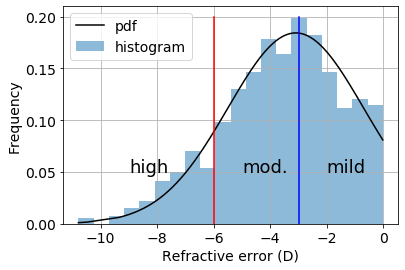

In [8]:
# Modified from:
# https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5800189/
# Values for mean and standard deviation of myopes in Poland.
# mean, std
mu, sigma = -3.1, 2.4
lower, upper = -12, 0

#instantiate an object X using the above four parameters,
X = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)

#generate 1000 sample data points
samples = X.rvs(1000)

#compute the PDF of the sample data
pdf_probs = stats.truncnorm.pdf(samples, (lower-mu)/sigma, (upper-mu)/sigma, mu, sigma)

plt.hist(samples, bins= 20, density=True, alpha=0.5, label='histogram')
plt.plot(samples[samples.argsort()], pdf_probs[samples.argsort()], 'k', label='pdf')
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")

# Mark off mild, moderate, high myopia
plt.plot([-3, -3], [0.0, 0.20], 'b-')
plt.plot([-6, -6], [0.0, 0.20], 'r-')
plt.text(-2, 0.05, "mild", fontsize=18)
plt.text(-5, 0.05, "mod.", fontsize=18)
plt.text(-9, 0.05, "high", fontsize=18)

plt.legend()
plt.grid()

The vertical lines  show the limits of weak, moderate, and high myopia on this probability distribution function. Myopia is defined as a refractive error of $\leq$ 0.5 D and approximately 25% of people are myopic. The rest (75%) are not. So the histogram above must apply to people **with** myopia, not the general population. Perhaps those with a genetic predisposition could be sampled from here. The rest could be sampled from a uniform distribution with some noise added to throw some people into mild clinical myopia. In the UK 200,000 out of 5 million have high myopia, that's 4%. 
*So, perhaps we can tie this to genetic factor above?* Or, select 75% from uniform, 25% from truncated normal and apply genetics after as a boost. We will investigate the best approach now.

For those with no myopia, sample from a uniform distribution with some added noise. I think the noise is important because sometimes those with no myopic parents can develop myopia, it's just relatively unlikely.

Text(0, 0.5, 'D')

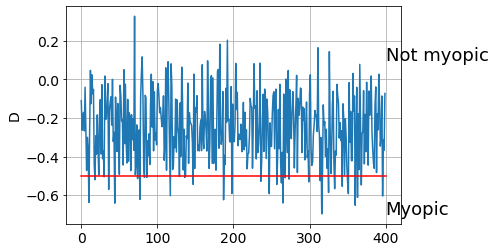

In [9]:
# Sample from a uniform distribution with some added noise.
base =  np.random.uniform(0, -0.5, n) + np.random.normal(0, 0.1, n)
# Beware positive values
x = np.arange(0, n)
plt.plot(x, base)
plt.plot([0, 400], [-0.5, -0.5], 'r')
plt.text(400, -0.7, "Myopic", fontsize=18)
plt.text(400, 0.1, "Not myopic", fontsize=18)

plt.grid()
plt.ylabel('D')

I think I will link refractive error to genetics. Each value of genetic predisposition will result in a normal distribution centred on different values of refraction.  

In [10]:
# What fraction of sample has each genetic predisposition?
fnone = np.count_nonzero(genes == 'none')/len(genes)
fsome = np.count_nonzero(genes == 'some')/len(genes)
fstrong = np.count_nonzero(genes == 'strong')/len(genes)

# Generate samples based on these fractions
print(n * fnone)
print(n * fsome)
print(n * fstrong)

# Want sum to always add to n for generating final dataframe. Doesn't always, so beware.
print(n * (fnone + fsome + fstrong))

239.0
121.0
40.0
400.0


478
242
80
800


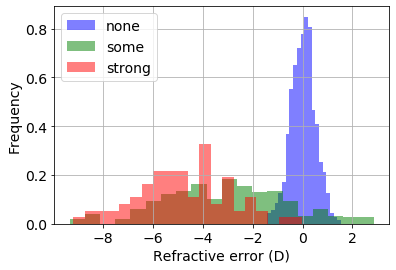

In [11]:
# Three distributions with different means and standard deviation. 
m0, s0 =  0, 0.5 # if Genes = none
m1, s1 = -3.2, 2.4 # if Genes = some
m2, s2 = -5, 2.4 # if Genes = strong

# Number of samples from each group reflects the number in that group.
# n from strong, more from some, more again from none
n0 = np.random.normal(m0, s0, int(2 *n * fnone))
n1 = np.random.normal(m1, s1, int(2 * n * fsome))
n2 = np.random.normal(m2, s2, int(2 * n * fstrong))

print(len(n0))
print(len(n1))
print(len(n2))
print(len(n0) + len(n1) + len(n2))

plt.hist(n0, bins=20, density=True, alpha=0.5, FaceColor='b', label="none")
plt.hist(n1, bins=20, density=True, alpha=0.5, FaceColor='g', label="some")
plt.hist(n2, bins=20, density=True, alpha=0.5, FaceColor='r', label="strong")
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.legend()
plt.grid()

If I combine these, what does the resulting distribution look like?

400


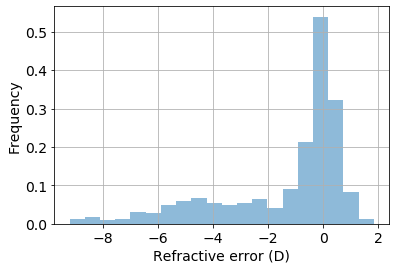

In [12]:
# Can see three populations, none, some, and strong
# Trying to replicate the truncated normal distribution above.

# Combine the three samples and pick n at random from the lot.
# Won't be doing it like this in the end, just for testing.
r = np.concatenate((n0, n1, n2), axis=None)
err = np.random.choice(r, n, replace=False)

# Histograms
plt.hist(err, bins=20, density=True, alpha=0.5)
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.grid()
print(len(err))

So, the results seem to be sensible. I think this is the approach I will take when generating a column of refractive error values based on the genes categorical variable.

### 4.3 Age
This variable will be called age. It is a numerical variable, a positive integer. It has a minimum value of zero and it increases in the positive direction. I need to find out what the typical distribution of ages is in a population. I can then relate environmental factors to it. It is not as easy as I thought it would be to find a distribution. What comes up a lot is the age-sex population pyramid. This is a horizontal bar chart which shows the amount of people in each age bin, usually broken down into males and females. Each country has its own characteristic population pyramid. I looked at the Central Staistics Office (CSO) website to find information for Ireland.

The CSO website has population data from the 2016 census. I'm not interested in any distinction made between the genders for this project. I'll read in the file and see what it looks like:

In [13]:
# Read in 2016 census data.
df = pd.read_csv('data\census2016.csv', header=None, nrows=18)

# Generate an 'age' label = to mid point of each age bin in the file.
df['years'] = np.arange(2, 89, 5)

# Generate a label for population
df['pop'] = df.iloc[:,1]

# Normalize data to max population
df['npop'] = df['pop']/df['pop'].max()
df

,0,1,years,pop,npop
0,0 - 4 years,331515,2,331515,0.851302
1,5 - 9 years,355561,7,355561,0.913050
2,10 - 14 years,319476,12,319476,0.820387
3,15 - 19 years,302816,17,302816,0.777606
4,20 - 24 years,273636,22,273636,0.702674
5,25 - 29 years,297435,27,297435,0.763788
6,30 - 34 years,361975,32,361975,0.929521
7,35 - 39 years,389421,37,389421,1.000000
8,40 - 44 years,357460,42,357460,0.917927
9,45 - 49 years,326110,47,326110,0.837423


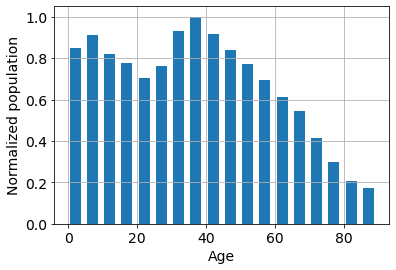

In [14]:
# What does this look like on a bar chart?
plt.bar(df['years'], df['npop'], width=3.2)
plt.xlabel('Age')
plt.ylabel('Normalized population')
plt.grid()

Ireland has a bulge at around seven years, and another at around 37 years. These reflect large populations of children and adults in their 30s. I would like to find a distribution that mimics this. The numpy random triangular distribution is often used when the underlying distribution of some variable is not known, but the limits and the mode are. I will use two triangular distributions, one with mode = 7 and the other with mode = 37. I'll join the two random samples and then pick n points at random from the resulting array.

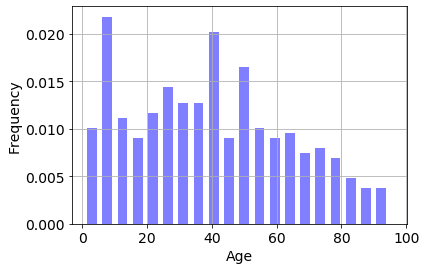

In [15]:
# Set up a distribution with mode = 7, limits 0 to 20 years.
young = np.random.triangular(0, 7, 20, n)
#plt.hist(young, bins=20, density=True, alpha=0.3, FaceColor='g')

# Set up a distribution with mode = 37, limits 0 to 100 years.
# Take five times as many samples from this distribution to reflect
# the range being five times larger than the young distribution. 
old = np.random.triangular(0, 37, 100, 5 * n)
#plt.hist(old, bins=20, density=True, alpha=0.3, FaceColor='r')

# Join them.
a = np.concatenate((young, old), axis=None)
#np.size(a)

# Now pick n at random from the resulting list
age = np.random.choice(a, n, replace=False)

# Convert to integers for age
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html
yrs = age.astype(int)

# Plot histogam.
plt.hist(age, bins=20, width=3, density=True, alpha=0.5, FaceColor='b' )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid()
#yrs

In [16]:
# Do this in a few lines with:
r = np.concatenate((np.random.triangular(0, 7, 20, n), np.random.triangular(0, 37, 100, 5 * n)), axis=None)
age = np.random.choice(r, n, replace=False)
#plt.hist(age, bins=20, width=3.2, density=True, alpha=0.4)

I played around with various parameters until I found the one which best mimics the population pyramid above. It always works better with lots of samples.

### 4.4 Environmental factors

Lots of articles on myopia will say that time spent outdoors is thought to have a protective effect against myopia. I guess the reason is that if someone increases the amount of time they spend outside, they must be reducing the time they spend inside doing close work like reading, or looking at phone and computer screens. When outside we tend to be looking at objects in the distance so our eyes are not working hard to bring close objects into focus. Imagine children in a playground or playing catch in the school yard, and adults out walking the dog or playing five-a-side football. 

I will model environmental factors as a numerical variable, with one decimal place, representing hours spent outside per week. It will have a minimum value of zero. I will attempt to estimate in a very general way how much time people spend outside at different stages of their life. So this variable will depend on the age variable above. Babies don't spend too much time outside, but this increases when they become toddlers and start playschool perhaps. Primary school children probably spend a reasonable amount of time outside at school break times, for example, and playing sports or on the street with their friends. It might increase again for teenagers who have longer school days but more independence. As people progress through college and into working life, they must make more of an effort to get outside, and outside time becomes the time spent doing leisure or sports activities. When I count up the hours I spend outside each week, it's actually surprisingly low, especially in winter. I want to find a relatively simple relationship between age in years and time outside in hours.

The README contains details of references I used to make the assumptions below.

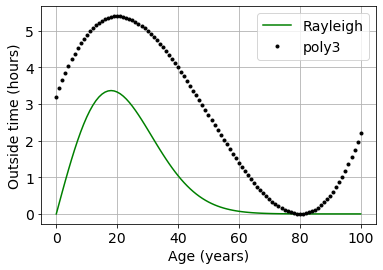

In [17]:
# Expect hours outside to vary with age, looks like the pdf for a Rayleigh - too complicated. Use third order poly.
# Here I am contriving a relationship that np.polyfit might be able to find later on.
x = np.arange(0, 101)

# mean, scale
m, s = 18, 5
ray_pdf = lambda s, x: 100  * (x / s ** 2) * ( np.exp( (-x **2) / (2 * s **2) )  )
plt.plot(x, ray_pdf(m, x), 'g-', label='Rayleigh')

#exp_pdf = lambda s, x: 50 * (1 / s ) * np.exp( - (x / s) )
#plt.plot(x, exp_pdf(m, x), 'r-')
#log_pdf = lambda m, s, x: 100 * (np.exp(- (x - m) / s ) ) / ( s * ( 1 +  (np.exp(- (x - m) / s ) ) ) ** 2 )

# Also try a third order polynomial with roots at -1, +80 and scale appropriately.
p3 = 0.00005 * ((x + 10) * (x - 80) * (x - 80))
#check = 0.00005 * ((x ** 3) - 150 * (x ** 2) + 4800 * x + 64000)
#p2 = 0.00005 * (- 150 * (x ** 2) + 4800 * x + 64000)
#p1 = 0.00005 * (4800 * x + 64000)

plt.plot(x, p3, 'k.', label='poly3')
#plt.plot(x, check, 'r-', label='check')
#plt.plot(x, p2, 'b-', label='p2')
#plt.plot(x, p1, 'c-', label='p1')

plt.legend()
#plt.xlim(0, 80)
plt.xlabel("Age (years)")
plt.ylabel("Outside time (hours)")
plt.grid()


I think this does a good job of modeling outside time up until about age 80. This is offset a little by the fact that ages over 80 only form a small part of the population as measured in the 2016 census. 

***
## 5. Generate the data set

Genes

In [18]:
genetic_predisp = ['none', 'some', 'strong']
genes = np.random.choice(genetic_predisp, n, p=[0.7, 0.25, 0.05])
df = pd.DataFrame(genes, columns = ['Genes'])

Years

In [19]:
young = np.random.triangular(0, 7, 20, n)
old = np.random.triangular(0, 37, 100, 5 * n)
a = np.concatenate((young, old), axis=None)
age = np.random.choice(a, n, replace=False)
years = age.astype(int)
df['Age'] = years

Hours

In [20]:
# Cycle through Age column, calculating this for each Age
h = 0.00005 * ((df['Age'] + 10) * (df['Age'] - 80) * (df['Age'] - 80)) + np.random.normal(0, 0.5, n)
print(type(h))
df['Hours'] = round(h,2)

<class 'pandas.core.series.Series'>


Refraction

In [21]:
# Cycle through Genes column generating a single refraction from a distribution which depends on Genes.
# Maybe boost each resulting ref error by value in Hours (which depends on Age)?

m0, s0 =  0, 0.5 # if Genes = none
m1, s1 = -3.2, 2.4 # if Genes = some
m2, s2 = -5, 2.4 # if Genes = strong

# Make empty list to hold refractive error.
err = [None]*n

# Fill the list depending on value of genes.
# Each number from normal dist is in a list - don't want that so use [0] to access the number, not the list.
# https://stackoverflow.com/questions/30311172/convert-list-or-numpy-array-of-single-element-to-float-in-python

for i, g in enumerate(genes):
    if g == 'some':
        q = np.random.normal(m1, s1, 1)
        err[i] = round(q[0], 2)
        #print("i {}: {}, {}".format(i, g, q))
    elif g == 'strong':
        q = np.random.normal(m2, s2, 1)
        err[i] = round(q[0],2)
        #print("i {}: {}, {}".format(i, g, q))
    else:
        q = np.random.normal(m0, s0, 1)
        err[i] = round(q[0],2)
        #print("i {}: {}, {}".format(i, g, q))

In [22]:
# Want to ignore/set=0 any positive values.
# lambda fun

df['Refraction'] = err
#df

In [23]:
# Modify refraction values by hours?
# Want it to increase with decreasing hours outside.

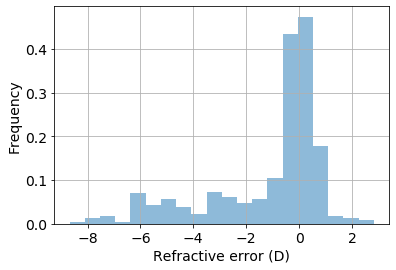

In [24]:
plt.hist(df['Refraction'], bins=20, density=True, alpha=0.5)
plt.xlabel("Refractive error (D)")
plt.ylabel("Frequency")
plt.grid()

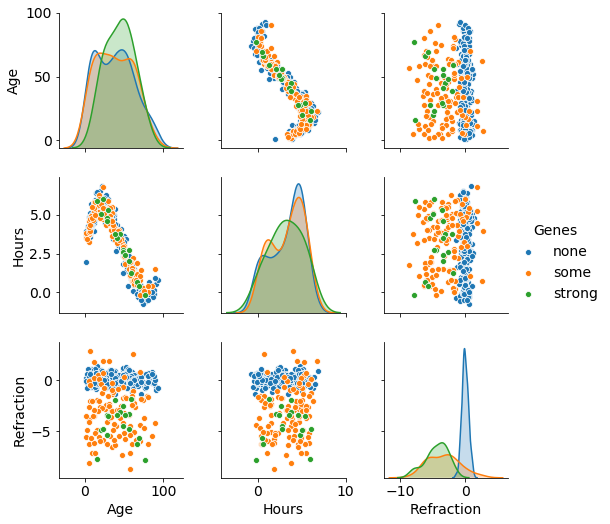

In [25]:
sns.pairplot(df, hue='Genes')

Summarize variables and data types:
- Genes
- Age
- Environmental factors
- Refraction

***
## References

**General:**

- [1]  Anaconda Distribution
https://www.anaconda.com/
- [2] Python Software Foundation
https://www.python.org/
- [3] Project Jupyter
https://jupyter.org/
- [4] Sharing Jupyter notebooks
https://nbviewer.jupyter.org/
- [5] matplotlib: Python plotting library
htts://matplotlib.org/
- [6] NumPy
https://numpy.org/
- [7] GitHub
https://github.com/
- [8] Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython. 
Wes McKinney. ISBN-13: 978-1491957660 ISBN-10: 1491957662
- [9] Random sampling (numpy.random)
https://docs.scipy.org/doc/numpy-1.16.0/reference/routines.random.html

**Myopia**

- [] WIKIPEDIA: Near-sightedness
https://en.wikipedia.org/wiki/Near-sightedness

- [] American Academy of Ophthalmology: Global Prevalence of Myopia and High Myopia and Temporal Trends from 2000 through 2050
https://www.aaojournal.org/article/S0161-6420(16)00025-7/abstract

- [] All about vision: What is myopia?
https://www.allaboutvision.com/conditions/myopia-faq/what-is-myopia.htm

- [] VISION EXCELLENCE: Myopia (short-sightedness)
https://www.visionexcellence.com.au/common-eye-conditions/myopia-short-sightedness/

- [] Cooper Vision: MiSight 1 day lenses
https://coopervision.co.uk/contact-lenses/misight-1-day

- [] [] All about vision: Why myopia progression is a concern.
https://www.allaboutvision.com/parents/myopia-progression.htm

- [] Health Service Executive: Myopia
https://www.hse.ie/eng/health/az/m/myopia/treating-short-sightedness.html

- [] IMI – Defining and Classifying Myopia: A Proposed Set of Standards for Clinical and Epidemiologic Studies
https://iovs.arvojournals.org/article.aspx?articleid=2727312

**Misc**

- [] Measuring Socioeconomic Status and Subjective Social Status
https://www.apa.org/pi/ses/resources/class/measuring-status

- [] BBC: What is your 21st Century social class?
https://www.bbc.com/news/magazine-34766169

**Genes**

- [] Insight into the molecular genetics of myopia (a bit technical)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5757860/

- [] Stanford at The Tech: Understanding Genetics 
https://genetics.thetech.org/ask/ask73

- [] Science Daily: New genetic risk factors for myopia discovered
https://www.sciencedaily.com/releases/2016/04/160421133905.htm

- [] All About Vision: Is being nearsighted genetic?
https://www.allaboutvision.com/conditions/myopia-faq/is-being-nearsighted-genetic.htm

**Refraction**

- [] Characteristics of Refractive Errors in a Population of Adults in the Central Region of Poland
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5800189/

- [] stackoverflow: How to specify upper and lower limits when using numpy.random.normal
https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal

**Age**

- [] WIKIPEDIA: Population pyramid
https://en.wikipedia.org/wiki/Population_pyramid

- [] StackExchange: If my histogram shows a bell-shaped curve, can I say my data is normally distributed?
https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib

- []  Central Statistics Office:  E3001: Enumerated Population 1926 to 2016 by Age Group, Sex and CensusYear
https://statbank.cso.ie/px/pxeirestat/Statire/SelectVarVal/Define.asp?maintable=E3001&PLanguage=0

**Environment**

- [] Scientists Determine the Exact Amount of Time We Should Be Spending Outside
https://www.inverse.com/article/56685-nature-outdoors-mental-health-link

- [] Healio Primary Care Optometry News: Time outdoors reduces myopia risk in subset of children
https://www.healio.com/optometry/pediatrics/news/online/%7B7aa57b69-30ea-44fb-9f44-5159e62a6f79%7D/time-outdoors-reduces-myopia-risk-in-subset-of-children

- [] Time spent in outdoor activities in relation to myopia prevention and control: a meta‐analysis and systematic review
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5599950/
"Saw et al. [9] showed that compared to children of nonmyopic parents, children of myopic parents have a higher degree of myopia (average, 0.39 D for those with one myopic parent and 0.74 D for those with two myopic parents)"

- [] The association between time spent outdoors and myopia in children and adolescents: a systematic review and meta-analysis.
https://www.ncbi.nlm.nih.gov/pubmed/22809757

- [] The National Human Activity Pattern Survey (NHAPS)
https://www.nature.com/articles/7500165.pdf?origin=ppub

- [] US Bureau of Labor Statistics: Average hours per day spent in selected activities by age
https://www.bls.gov/charts/american-time-use/activity-by-age.htm

- [] Flowing Data: How People Like You Spend Their Time (interactive tool based on above reference)
https://flowingdata.com/2016/12/06/how-people-like-you-spend-their-time/

- [] Independent: CHILDREN SPEND TWICE AS LONG LOOKING AT SCREENS THAN PLAYING OUTSIDE, STUDY FINDS
https://www.independent.co.uk/life-style/children-screens-play-outside-computer-phone-time-healthy-games-a8603411.html

- [] Child in the City: Children spend half the time playing outside in comparison to their parents
https://www.childinthecity.org/2018/01/15/children-spend-half-the-time-playing-outside-in-comparison-to-their-parents/?gdpr=accept